<a href="https://colab.research.google.com/github/Srividhyambika/git-workshop-2025/blob/main/edav_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
upload=files.upload()


Saving diabetes.csv to diabetes.csv


In [11]:
df=pd.read_csv('diabetes.csv')
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:

print(" Dataset Info")
print(df.info(), "\n")

print("Missing Values")
print(df.isnull().sum(), "\n")

printf("First 5 Rows")
print(df.head(), "\n")

print("decribe ")
df.describe()

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None 

=== Missing Values ===
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesP

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
# Replace 0s in key columns with NaN (since 0 is not medically valid)
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Fill missing values with the median (robust to outliers)
df[cols_with_zero] = df[cols_with_zero].fillna(df[cols_with_zero].median())

# Outcome distribution (percentage of each class)
print("\nDiabetes Outcome Distribution:")
print(df['Outcome'].value_counts(normalize=True) * 100)



Diabetes Outcome Distribution:
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


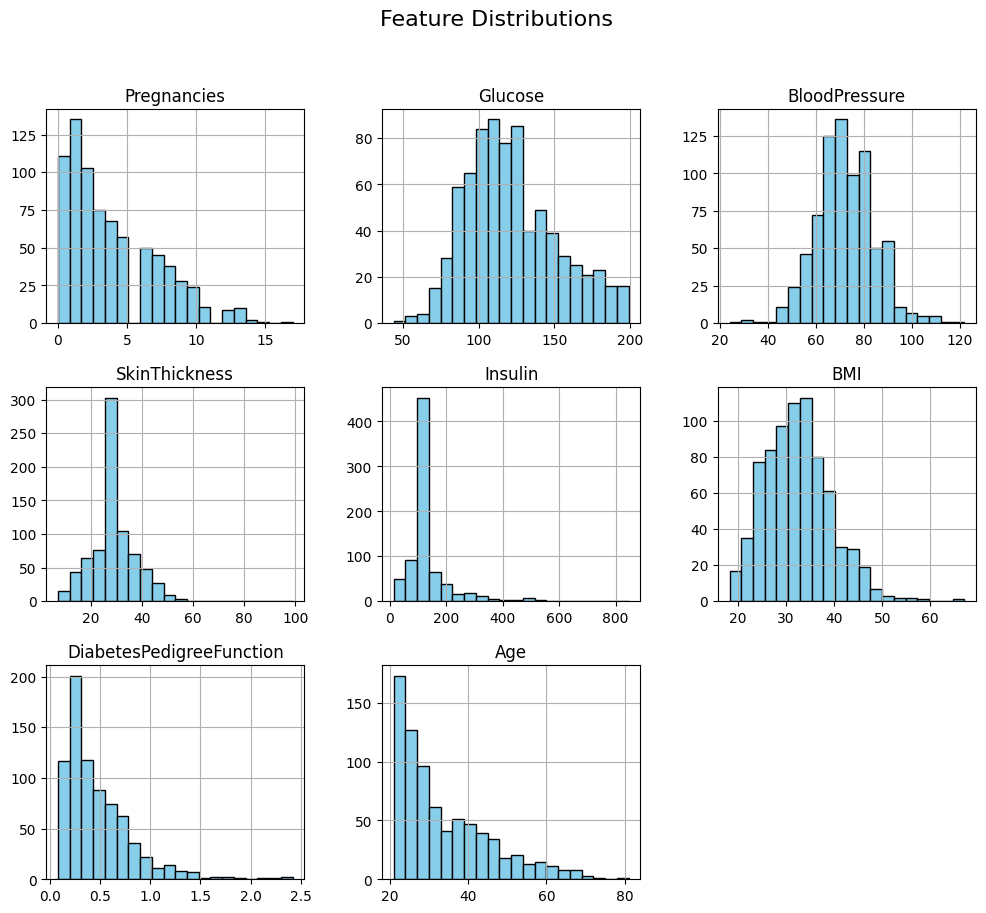

In [ ]:
# Univariate Analysis
numeric_cols = df.columns.drop('Outcome')
# Histograms
df[numeric_cols].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

/tmp/ipython-input-2918313142.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='viridis')


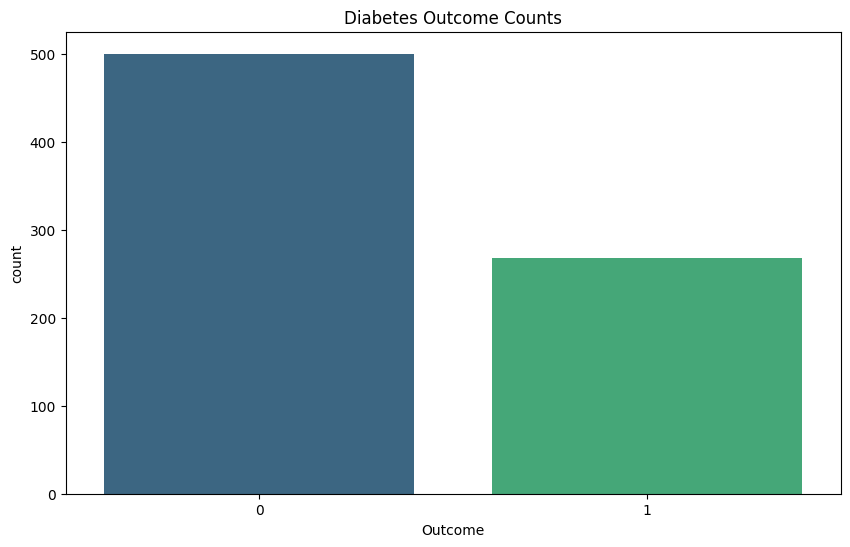

In [ ]:
# Bivariate Analysis (Feature vs Outcome)
plt.figure(figsize=(10,6))
sns.countplot(x='Outcome', data=df, palette='viridis')
plt.title("Diabetes Outcome Counts")
plt.show()


In [ ]:
#Grouped Statistical Analysis
print("\n Mean Values by Outcome")
print(df.groupby('Outcome')[['Glucose','BMI','Age','Insulin','BloodPressure']].mean())

print("\nMedian Values by Outcome")
print(df.groupby('Outcome')[['Glucose','BMI','Age','Insulin','BloodPressure']].median())


----- Mean Values by Outcome -----
            Glucose        BMI        Age     Insulin  BloodPressure
Outcome                                                             
0        110.682000  30.885600  31.190000  127.792000      70.920000
1        142.130597  35.383582  37.067164  164.701493      75.123134

----- Median Values by Outcome -----
         Glucose    BMI   Age  Insulin  BloodPressure
Outcome                                              
0          107.5  30.40  27.0    125.0           72.0
1          140.0  34.25  36.0    125.0           74.0


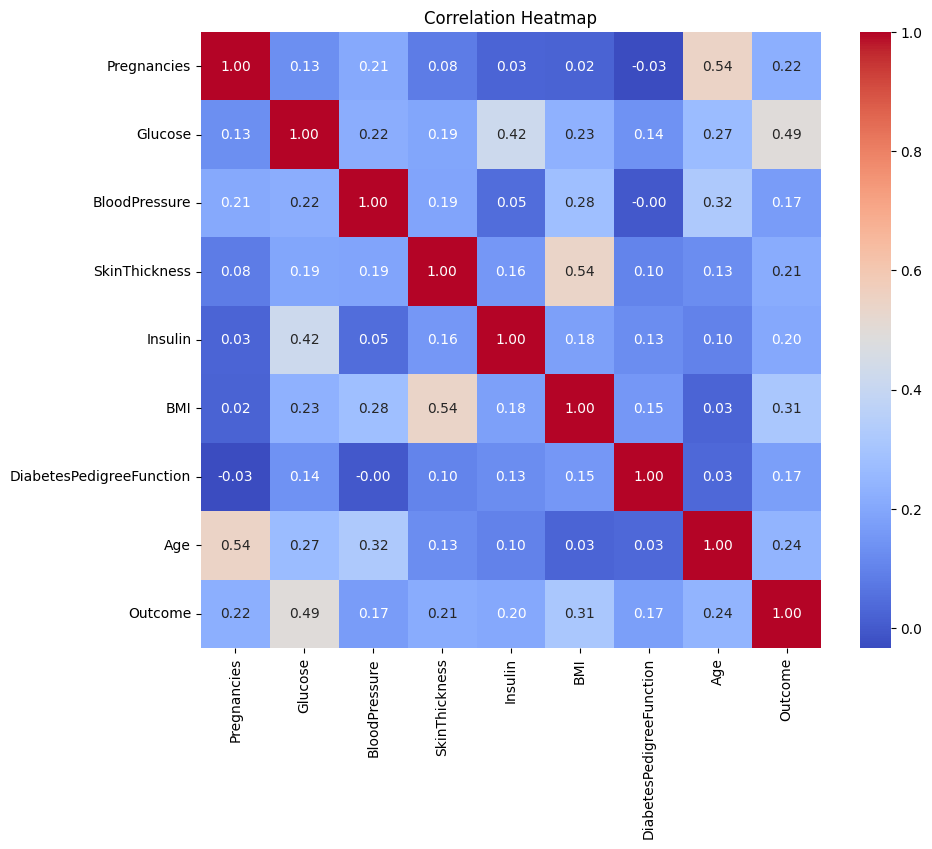

In [ ]:
# Correlation Analysis
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


/tmp/ipython-input-2104561784.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_outcome = df.groupby('AgeGroup')['Outcome'].mean() * 100
/tmp/ipython-input-2104561784.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_outcome = df.groupby('BMICategory')['Outcome'].mean() * 100
/tmp/ipython-input-2104561784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_outcome.index, y=age_outcome.values, palette='Blues', ax=ax[0])
/tmp/ipython-input-210


----- Diabetes Rate by Age Group (%) -----
AgeGroup
20-30    21.582734
30-40    48.407643
40-50    56.637168
50-60    57.407407
60-70    28.000000
70-80     0.000000
80+       0.000000
Name: Outcome, dtype: float64

----- Diabetes Rate by BMI Category (%) -----
BMICategory
Underweight     0.000000
Normal          6.481481
Overweight     24.444444
Obese          45.588235
Name: Outcome, dtype: float64


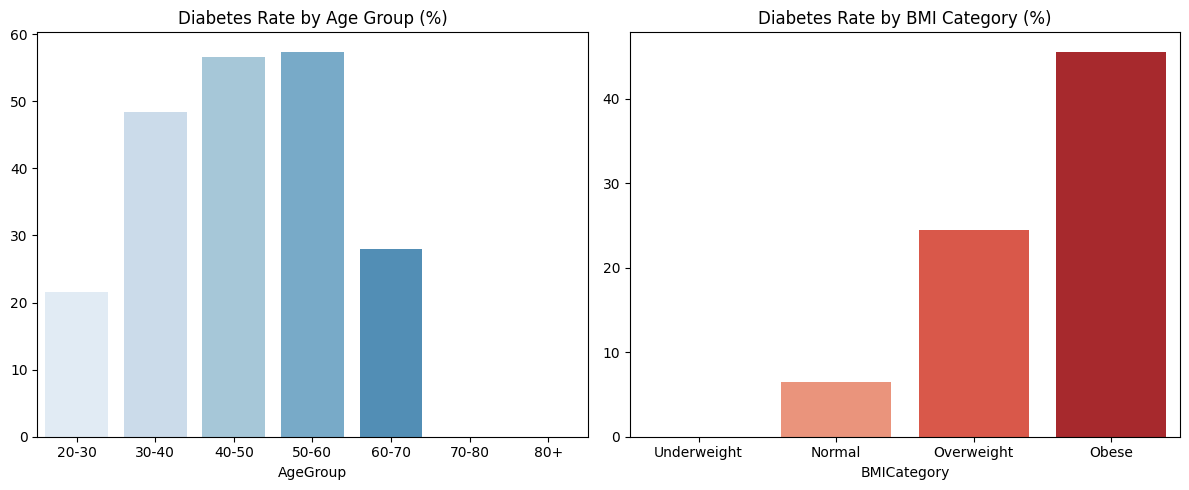

In [ ]:
# Derived Feature Analysis
# Age group bins
df['AgeGroup'] = pd.cut(df['Age'], bins=[20,30,40,50,60,70,80,90], labels=['20-30','30-40','40-50','50-60','60-70','70-80','80+'])

# BMI categories
df['BMICategory'] = pd.cut(df['BMI'], bins=[0,18.5,25,30,100], labels=['Underweight','Normal','Overweight','Obese'])

# Diabetes rate per Age group
age_outcome = df.groupby('AgeGroup')['Outcome'].mean() * 100
print("\n Diabetes Rate by Age Group (%)")
print(age_outcome)

# Diabetes rate per BMI category
bmi_outcome = df.groupby('BMICategory')['Outcome'].mean() * 100
print("\n Diabetes Rate by BMI Category (%)")
print(bmi_outcome)

# Plot these rates
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(x=age_outcome.index, y=age_outcome.values, palette='Blues', ax=ax[0])
ax[0].set_title('Diabetes Rate by Age Group (%)')
sns.barplot(x=bmi_outcome.index, y=bmi_outcome.values, palette='Reds', ax=ax[1])
ax[1].set_title('Diabetes Rate by BMI Category (%)')
plt.tight_layout()
plt.show()


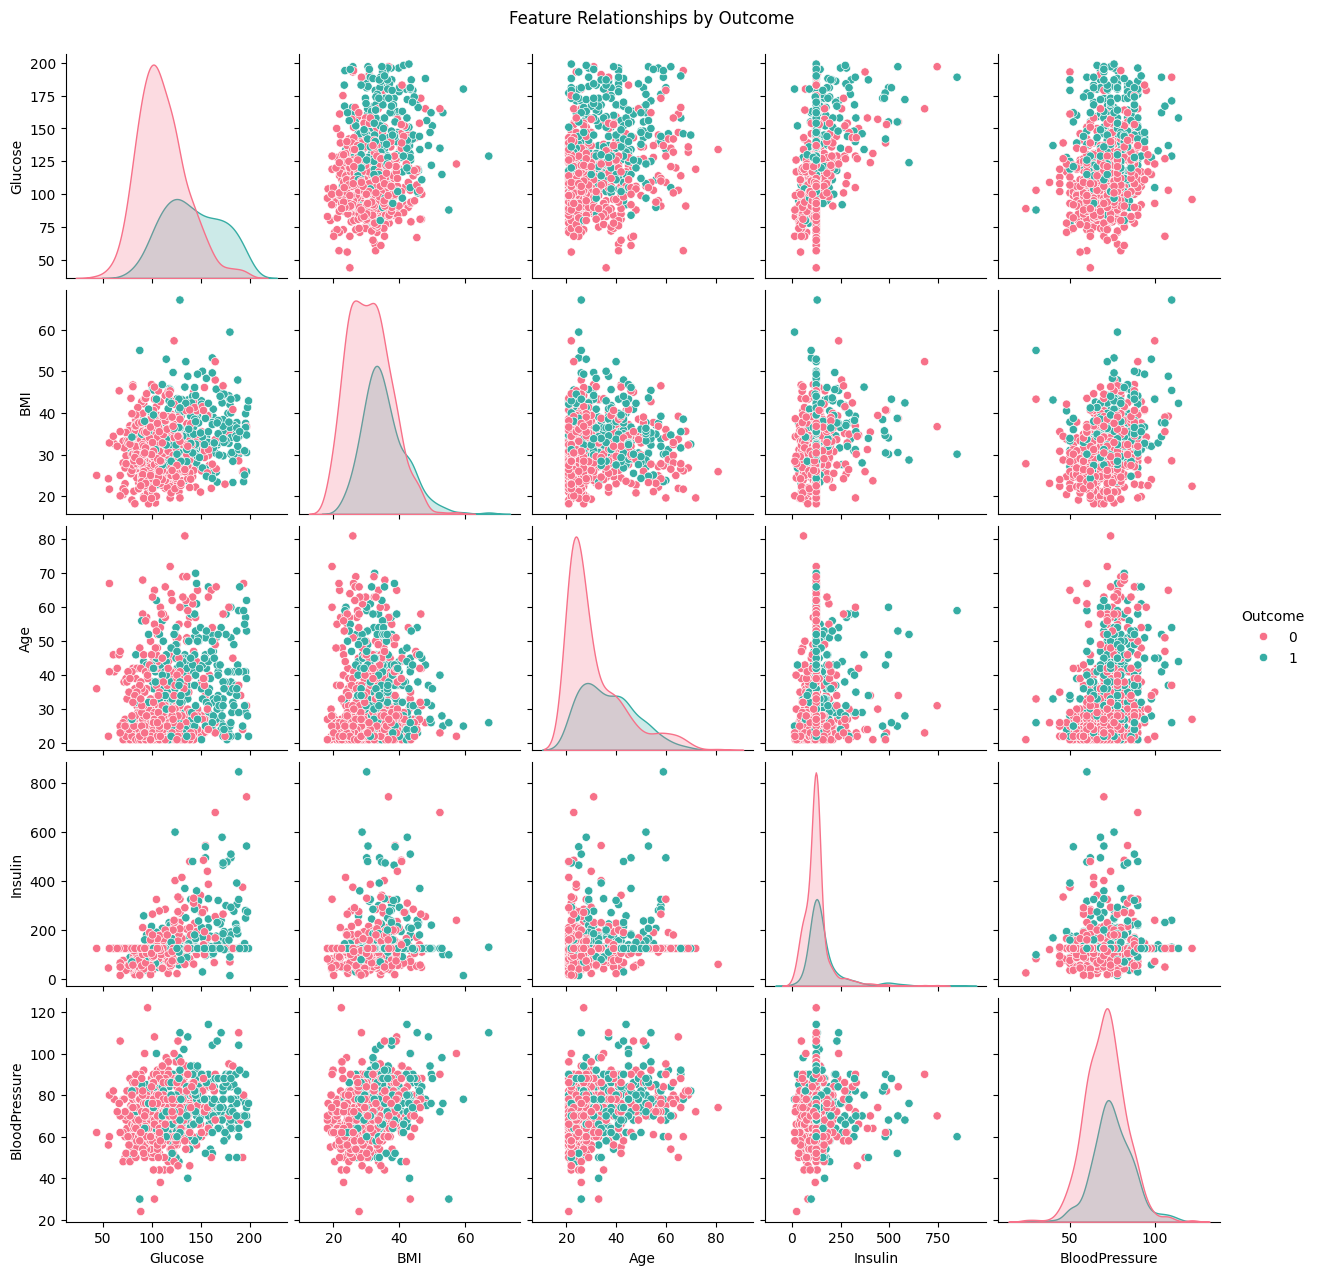

In [ ]:
# Pairplot for Relationships
sns.pairplot(df, vars=['Glucose','BMI','Age','Insulin','BloodPressure'], hue='Outcome', diag_kind='kde', palette='husl')
plt.suptitle("Feature Relationships by Outcome", y=1.02)
plt.show()


In [ ]:
# Percentiles Analysis-
# Exclude non-numeric columns for quantile calculation
numeric_df = df.select_dtypes(include=np.number)
percentiles = numeric_df.quantile([0.25, 0.5, 0.75])
print("\n Overall Percentiles (25th, 50th, 75th)")
print(percentiles)

# Percentiles by Outcome
# Exclude non-numeric columns for quantile calculation by group
outcome_percentiles = numeric_df.groupby(df['Outcome']).quantile([0.25, 0.5, 0.75])
print("\n Percentiles by Outcome ")
print(outcome_percentiles)


----- Overall Percentiles (25th, 50th, 75th) -----
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0.25          1.0    99.75           64.0           25.0   121.50  27.5   
0.50          3.0   117.00           72.0           29.0   125.00  32.3   
0.75          6.0   140.25           80.0           32.0   127.25  36.6   

      DiabetesPedigreeFunction   Age  Outcome  
0.25                   0.24375  24.0      0.0  
0.50                   0.37250  29.0      0.0  
0.75                   0.62625  41.0      1.0  

----- Percentiles by Outcome -----
              Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
Outcome                                                                     
0       0.25         1.00     93.0           63.5           22.0    95.00   
        0.50         2.00    107.5           72.0           29.0   125.00   
        0.75         5.00    125.0           78.0           31.0   125.00   
1       0.25         1.75    119.0

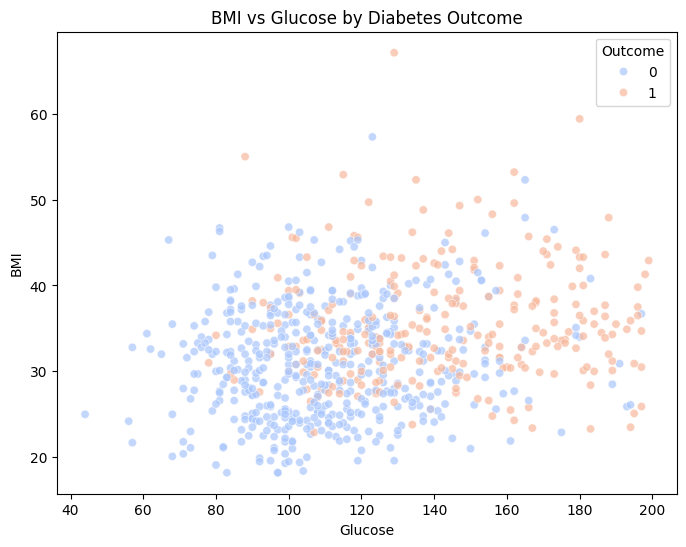

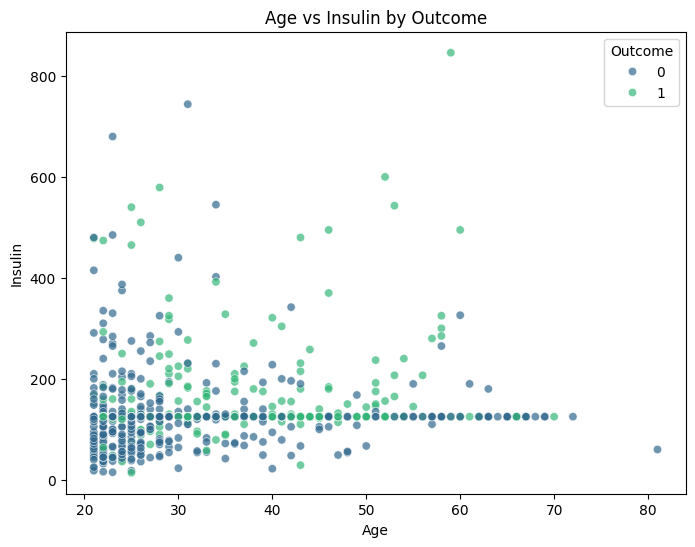


 Analysis Completed Successfully!


In [ ]:
# It visualizes multivariate relationships by plotting Glucose vs BMI and Age vs Insulin colored by diabetes outcome
plt.figure(figsize=(8,6))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, palette='coolwarm', alpha=0.7)
plt.title("BMI vs Glucose by Diabetes Outcome")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Insulin', hue='Outcome', data=df, palette='viridis', alpha=0.7)
plt.title("Age vs Insulin by Outcome")
plt.show()

print("\n Analysis Completed Successfully!")